## Biblioteca importadas

In [1]:

import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt




## Leitura das bases de dados de cada aeroportos


#### Frequencia de passageiros no aeroporto CWB

In [2]:
#nacional 
filename = r'C:Passageiros pagos\cwb_nac.xlsx'
cwb_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\cwb_int.xlsx'
cwb_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )


#### Frequencia de passageiros no aeroporto IGU

In [3]:
#nacional
filename = r'C:Passageiros pagos\igu_nac.xlsx'
igu_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\igu_int.xlsx'
igu_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )

#### Frequencia de passageiros no aeroporto NVT

In [4]:
#nacional
filename = r'C:Passageiros pagos\nvt_nac.xlsx'
nvt_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\nvt_int.xlsx'
nvt_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )

#### Frequencia de passageiros no aeroporto PMW

In [5]:
filename = r'C:Passageiros pagos\pmw.xlsx'
pmw = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#### Frequencia de passageiros no aeroporto SLZ

In [6]:
filename = r'C:Passageiros pagos\slz.xlsx'
slz = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#### Frequencia de passageiros no aeroporto SJO

In [7]:
##nacional
#filename = r'C:\Users\vitor\OneDrive\Documentos\INSPER_JR\Decolagem_I\regressão\Passageiros pagos\sjo_nac.csv'
#dados7 = pd.read_csv(filename)

##internacional
#filename = r'C:\Users\vitor\OneDrive\Documentos\INSPER_JR\Decolagem_I\regressão\Passageiros pagos\sjo_int.csv'
#dados6 = pd.read_csv(filename)



## Variaveis macro economicas

#### Valor do barril de petróleo

In [8]:
filename = r'C:Dados macros\statistic_id262858_opec-oil-price-annually-1960-2022.xlsx'
oil = pd.read_excel(filename)

#### Cotação do dolar

In [9]:
filename = r'C:Dados macros\Base de dados Dólar.xlsx'
dolar = pd.read_excel(filename)
dolar = dolar.drop(["valor"], axis =1)


#### Inflação do turismo no Brasil

In [10]:
filename = r'C:Dados macros\statistic_id270812_inflation-rate-in-brazil-2027.xlsx'
inflacao = pd.read_excel(filename)
inflacao = inflacao.drop(["valor"], axis =1)
inflacao

,Ano,inflacao
0,1987,2.2833
1,1988,6.2912
2,1989,14.3072
3,1990,29.4773
4,1991,4.3277
5,1992,9.5196
6,1993,19.2738
7,1994,20.7583
8,1995,0.6601
9,1996,0.1576


#### PIB do Brasil e dos Estados dos aeroportos 

In [11]:
filename = r'C:Dados macros\PIB_brasil_freq.xlsx'
pib = pd.read_excel(filename)
pib = pib.drop(["valor"], axis =1)

## Curitiba

##### juntando os pontos macros e uma unico DataFrame

In [12]:
principal_cwb =(cwb_nac
 .join(cwb_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )


#### Correlação entre os dados pré selecionados 

In [13]:
principal_cwb.loc[principal_cwb["Ano"] == 2019, "Passageiros_freq"] = 0 
principal_cwb = principal_cwb.loc[principal_cwb["Ano"]<2020]

principal_cwb.corr()


,Ano,Passageiros,Passageiros_freq,numero_de_passageiros,Passageiros internacionais,Oil,dolar,inflacao,PIB REAL BRASIL
Ano,1.000000,-0.293186,-0.358079,0.825633,0.537493,0.498046,0.037939,-0.379601,-0.318404
Passageiros,-0.293186,1.000000,0.078807,-0.063689,0.161951,0.098898,0.037912,-0.386823,0.505320
Passageiros_freq,-0.358079,0.078807,1.000000,-0.418328,-0.114150,-0.059042,-0.378978,-0.229385,0.427399
numero_de_passageiros,0.825633,-0.063689,-0.418328,1.000000,0.747097,0.757172,0.173023,-0.283610,-0.199266
Passageiros internacionais,0.537493,0.161951,-0.114150,0.747097,1.000000,0.769081,-0.042033,-0.354779,0.168868
Oil,0.498046,0.098898,-0.059042,0.757172,0.769081,1.000000,0.152472,-0.422720,0.287197
dolar,0.037939,0.037912,-0.378978,0.173023,-0.042033,0.152472,1.000000,0.077090,-0.058331
inflacao,-0.379601,-0.386823,-0.229385,-0.283610,-0.354779,-0.422720,0.077090,1.000000,-0.353719
PIB REAL BRASIL,-0.318404,0.505320,0.427399,-0.199266,0.168868,0.287197,-0.058331,-0.353719,1.000000


#### Análise grafica

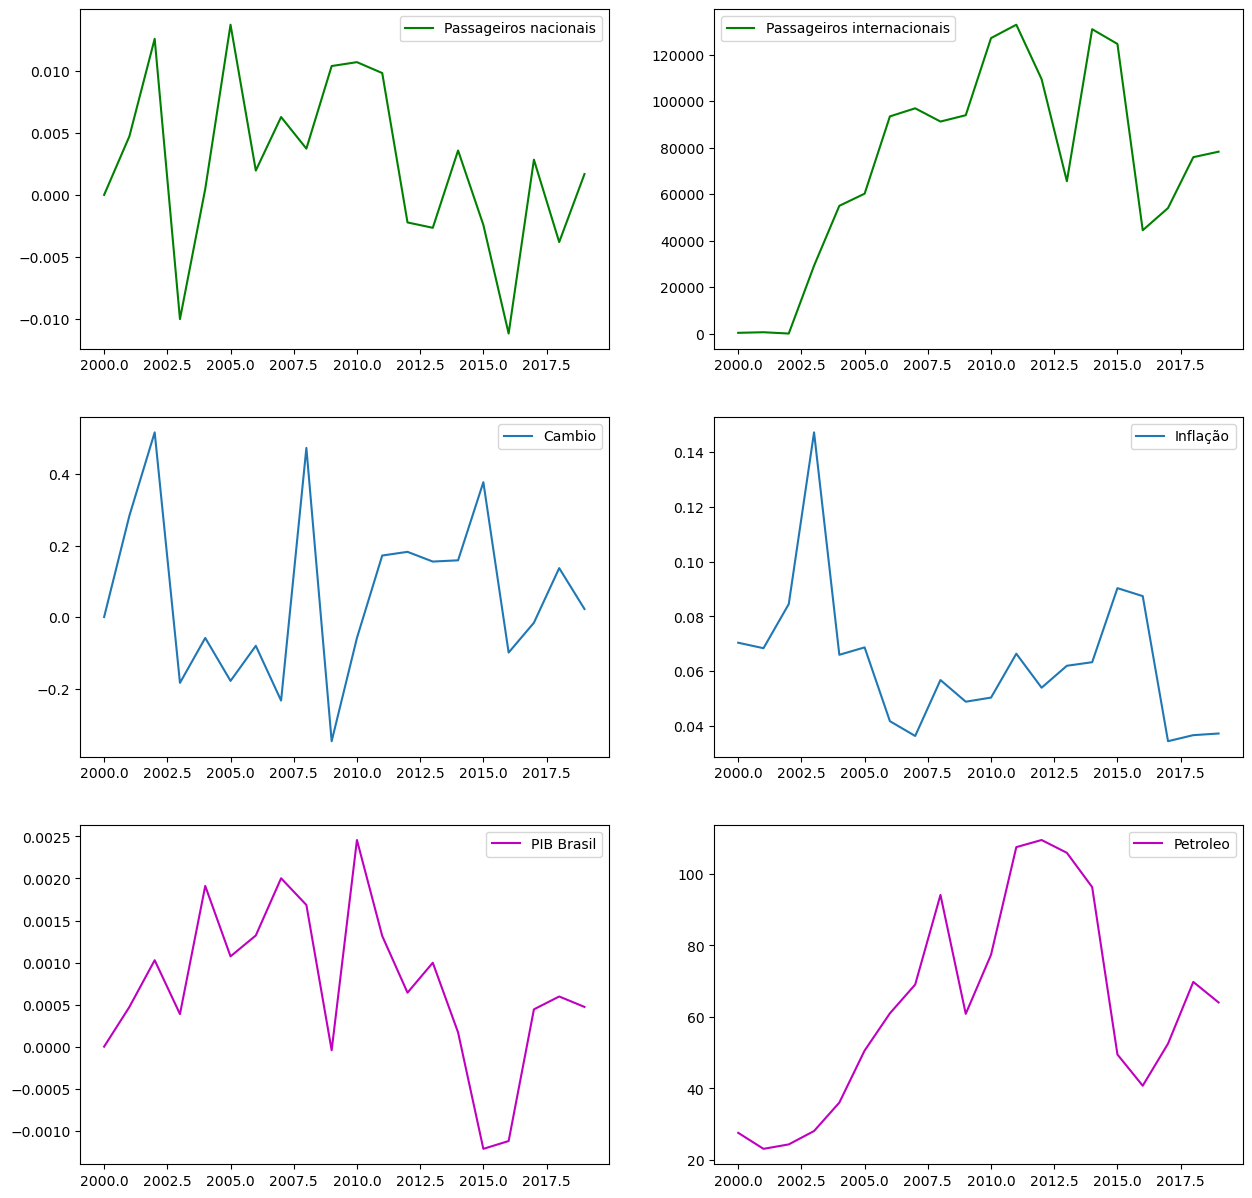

In [14]:
fig, ax = plt.subplots(3,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal_cwb["Ano"], principal_cwb["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal_cwb["Ano"], principal_cwb["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal_cwb["Ano"], principal_cwb["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal_cwb["Ano"], principal_cwb["inflacao"], label='Inflação')
ax[1,1].legend()

#ax[2,0].plot(principal["Ano"], principal["PIB REAL PR"],"c", label = 'PIB PR' )
#ax[2,0].legend()

#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
#ax[2,1].legend()

ax[2,0].plot(principal_cwb["Ano"], principal_cwb["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[2,0].legend()

ax[2,1].plot(principal_cwb["Ano"], principal_cwb["Oil"],"m", label='Petroleo')
ax[2,1].legend()

plt.show()

#### Dividindo a base de dados em treinamento e teste

In [15]:
treino = principal_cwb.loc[principal_cwb["Ano"] < 2017]
teste = principal_cwb.loc[principal_cwb["Ano"] >= 2000]

In [16]:
y_train= treino["Passageiros"].copy()
y_test= teste["Passageiros"].copy()

X_train = treino.drop(["Passageiros", "Passageiros internacionais","Ano","numero_de_passageiros","Oil"],axis=1).copy()
X_test = teste.drop(["Passageiros", "Passageiros internacionais","Ano", "numero_de_passageiros","Oil"],axis=1).copy()

In [17]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))


print(f"Coeficiente da regressão linear: {reg.coef_}")
print(reg.intercept_)
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")

Coeficiente da regressão linear: [-2.64386919e-01  1.46311138e-04 -1.22504636e-01  3.07289999e+00]
0.009725204828227823
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
O erro do modelo sem ajuste foi: 0.005720584131793195


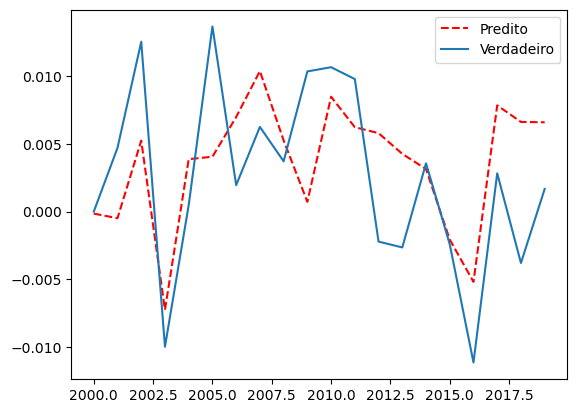

In [18]:
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, principal_cwb["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()


In [19]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

{'poly__degree': 1}


In [20]:
y_pred_pipeline = clf_pipe.predict(X_train)

In [21]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

O erro do modelo com ajuste foi: 0.00540147948584624


In [22]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

RMSE = 0.005720584131793201


In [23]:
#ano_lista = np.arange(2017,2020,1)
#
#
#plt.plot(ano_lista,final_predictions ,'--r', label='Predito')
#plt.plot(ano_lista, y_test, label = 'Verdadeiro' )
#plt.legend()
#plt.show()

In [24]:
import statsmodels.api as sm

#define response variable
y = principal_cwb["Passageiros"].loc[principal_cwb["Ano"]<2020]

#define predictor variables
x = principal_cwb.drop(["Passageiros", "Passageiros internacionais","Ano","numero_de_passageiros","Oil"],axis=1).loc[principal_cwb["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Passageiros   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     1.889
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.165
Time:                        11:11:06   Log-Likelihood:                 75.816
No. Observations:                  20   AIC:                            -141.6
Df Residuals:                      15   BIC:                            -136.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0046      0.005  

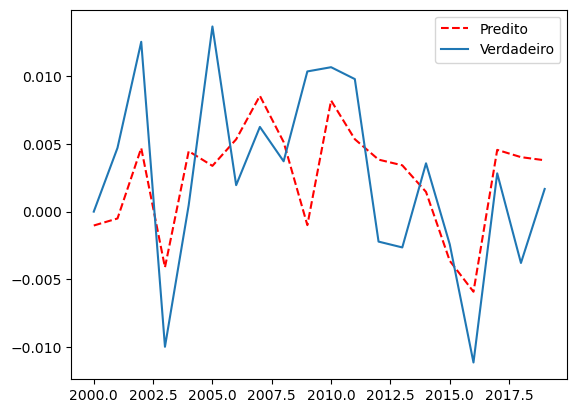

In [25]:
ypred = model.predict(x)
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista,ypred,'--r', label='Predito')
plt.plot(ano_lista, principal_cwb["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()

## Foz do Iguaçu

##### juntando os pontos macros e uma unico DataFrame

In [26]:
principal_igu =(igu_nac
 .join(igu_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [27]:
principal_igu.loc[principal_igu["Ano"] == 2019, "Passageiros_freq"] = 0 
principal_igu = principal_igu.loc[principal_igu["Ano"]<2020]

principal_igu.corr()


,Ano,Passageiros,Passageiros_freq,numero_de_passageiros,Passageiros internacionais,Oil,dolar,inflacao,PIB REAL BRASIL
Ano,1.000000,0.025111,-0.073215,0.965459,0.856124,0.498046,0.037939,-0.379601,-0.318404
Passageiros,0.025111,1.000000,0.220094,0.071045,0.054257,0.184890,-0.144905,-0.004514,0.379557
Passageiros_freq,-0.073215,0.220094,1.000000,-0.229729,-0.289672,-0.058577,-0.362140,0.128012,0.282233
numero_de_passageiros,0.965459,0.071045,-0.229729,1.000000,0.927720,0.477749,0.128597,-0.329348,-0.370921
Passageiros internacionais,0.856124,0.054257,-0.289672,0.927720,1.000000,0.386478,0.171819,-0.238665,-0.390572
Oil,0.498046,0.184890,-0.058577,0.477749,0.386478,1.000000,0.152472,-0.422720,0.287197
dolar,0.037939,-0.144905,-0.362140,0.128597,0.171819,0.152472,1.000000,0.077090,-0.058331
inflacao,-0.379601,-0.004514,0.128012,-0.329348,-0.238665,-0.422720,0.077090,1.000000,-0.353719
PIB REAL BRASIL,-0.318404,0.379557,0.282233,-0.370921,-0.390572,0.287197,-0.058331,-0.353719,1.000000


##### Análise grafica

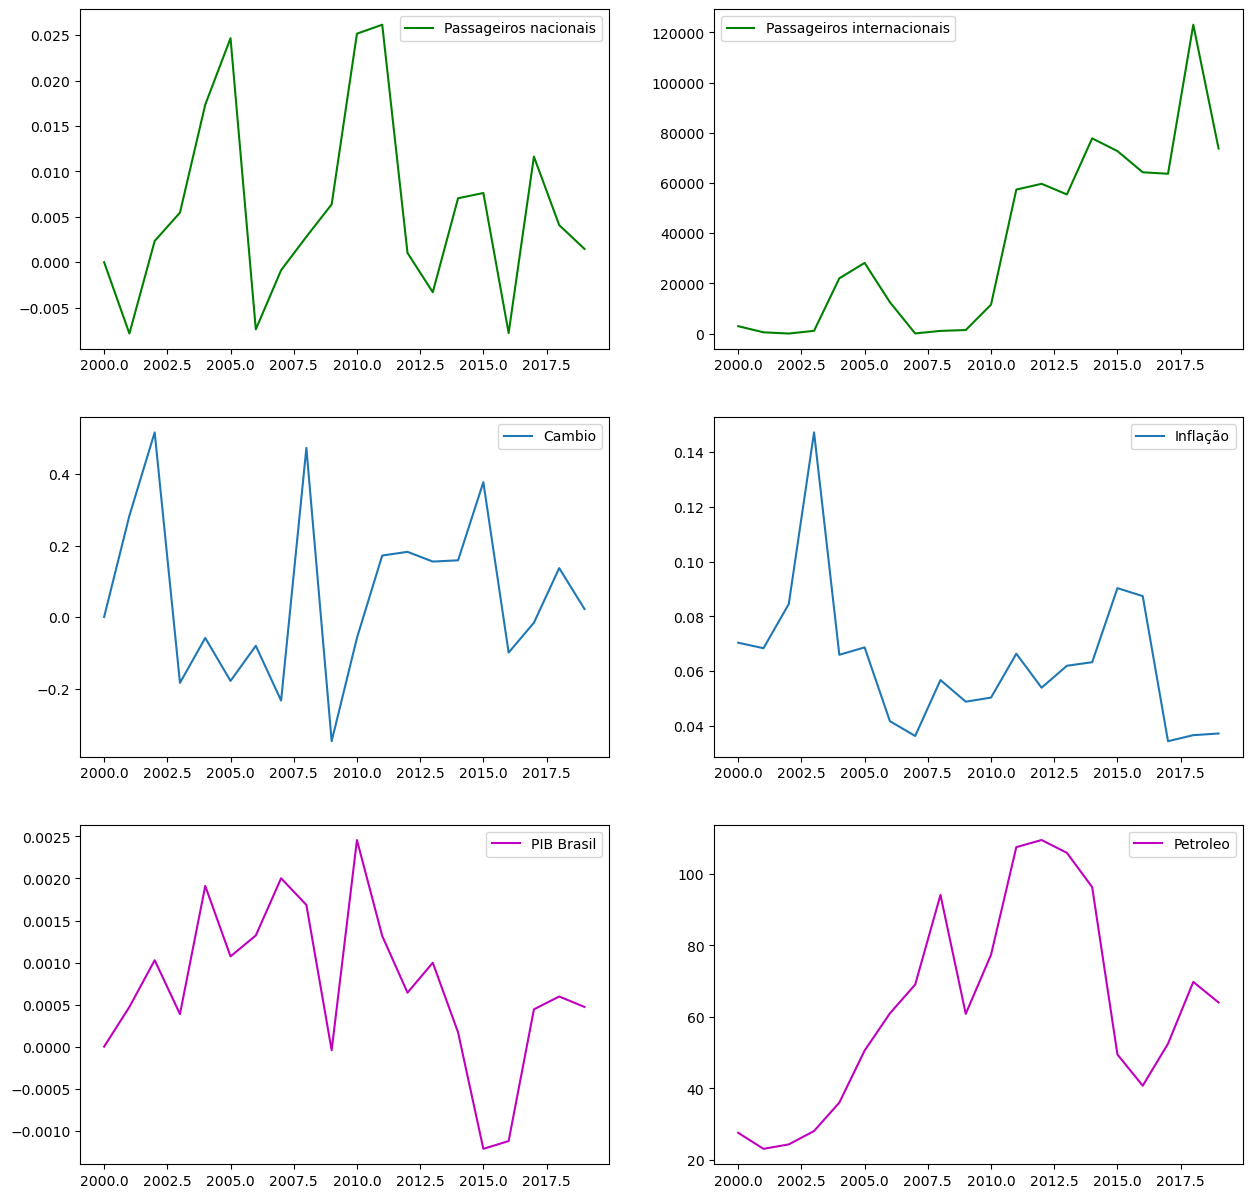

In [28]:
fig, ax = plt.subplots(3,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal_igu["Ano"], principal_igu["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal_igu["Ano"], principal_igu["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal_igu["Ano"], principal_igu["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal_igu["Ano"], principal_igu["inflacao"], label='Inflação')
ax[1,1].legend()

#ax[2,0].plot(principal["Ano"], principal["PIB REAL PR"],"c", label = 'PIB PR' )
#ax[2,0].legend()
#
#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
#ax[2,1].legend()
#
ax[2,0].plot(principal_igu["Ano"], principal_igu["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[2,0].legend()

ax[2,1].plot(principal_igu["Ano"], principal_igu["Oil"],"m", label='Petroleo')
ax[2,1].legend()

plt.show()

#### Dividindo a base de dados em treinamento e teste

In [29]:
treino = principal_igu.loc[principal_igu["Ano"] < 2017]
teste = principal_igu.loc[principal_igu["Ano"] >= 2000]

In [30]:
y_train= treino["Passageiros"].copy()
y_test= teste["Passageiros"].copy()

X_train = treino.drop(["Passageiros", "Passageiros internacionais","Ano","numero_de_passageiros","Oil"],axis=1).copy()
X_test = teste.drop(["Passageiros", "Passageiros internacionais","Ano","numero_de_passageiros","Oil"],axis=1).copy()

In [31]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))


print(f"Coeficiente da regressão linear: {reg.coef_}")
print(reg.intercept_)
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")


Coeficiente da regressão linear: [ 3.22445222e-02 -5.00918193e-03  9.67117583e-02  5.19209915e+00]
-0.00469367095218824
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
O erro do modelo sem ajuste foi: 0.009315659584372828


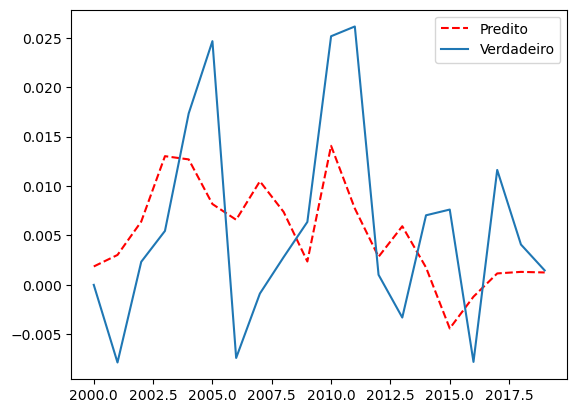

In [32]:
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, principal_igu["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()


In [33]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

{'poly__degree': 1}


In [34]:
y_pred_pipeline = clf_pipe.predict(X_train)

In [35]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

O erro do modelo com ajuste foi: 0.00975636125777233


In [36]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

RMSE = 0.00931565958437283


In [37]:
import statsmodels.api as sm

#define response variable
y = principal_igu["Passageiros"].loc[principal_igu["Ano"]<2020]

#define predictor variables
x = principal_igu.drop(["Passageiros", "Passageiros internacionais","Ano","numero_de_passageiros","Oil"],axis=1).loc[principal_igu["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Passageiros   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.8343
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.524
Time:                        11:11:13   Log-Likelihood:                 65.291
No. Observations:                  20   AIC:                            -120.6
Df Residuals:                      15   BIC:                            -115.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0012      0.008  

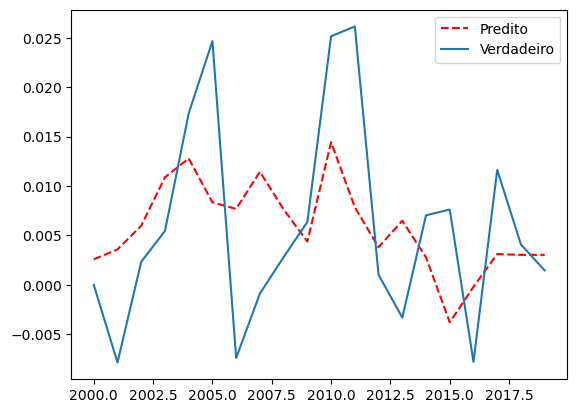

In [38]:
ypred = model.predict(x)
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista,ypred,'--r', label='Predito')
plt.plot(ano_lista, principal_igu["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()

## Navegantes

##### juntando os pontos macros e uma unico DataFrame

In [39]:
principal_nvt =(nvt_nac
 .join(nvt_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [40]:
 
principal_nvt = principal_nvt.loc[principal_nvt["Ano"]<2020]

principal_nvt.corr()


,Ano,Passageiros,Passageiros_freq,numero_de_passageiros,Passageiros internacionais,Oil,dolar,inflacao,PIB REAL BRASIL
Ano,1.000000,0.345963,0.063554,0.874199,0.440303,0.498046,0.037939,-0.379601,-0.318404
Passageiros,0.345963,1.000000,0.334536,0.254566,0.136785,0.357570,-0.347742,-0.440088,0.066601
Passageiros_freq,0.063554,0.334536,1.000000,-0.250818,-0.139754,0.313368,-0.136459,0.048770,0.207299
numero_de_passageiros,0.874199,0.254566,-0.250818,1.000000,0.499191,0.326950,0.165501,-0.296078,-0.471298
Passageiros internacionais,0.440303,0.136785,-0.139754,0.499191,1.000000,0.046403,0.030340,-0.332472,-0.040839
Oil,0.498046,0.357570,0.313368,0.326950,0.046403,1.000000,0.152472,-0.422720,0.287197
dolar,0.037939,-0.347742,-0.136459,0.165501,0.030340,0.152472,1.000000,0.077090,-0.058331
inflacao,-0.379601,-0.440088,0.048770,-0.296078,-0.332472,-0.422720,0.077090,1.000000,-0.353719
PIB REAL BRASIL,-0.318404,0.066601,0.207299,-0.471298,-0.040839,0.287197,-0.058331,-0.353719,1.000000


##### Análise grafica

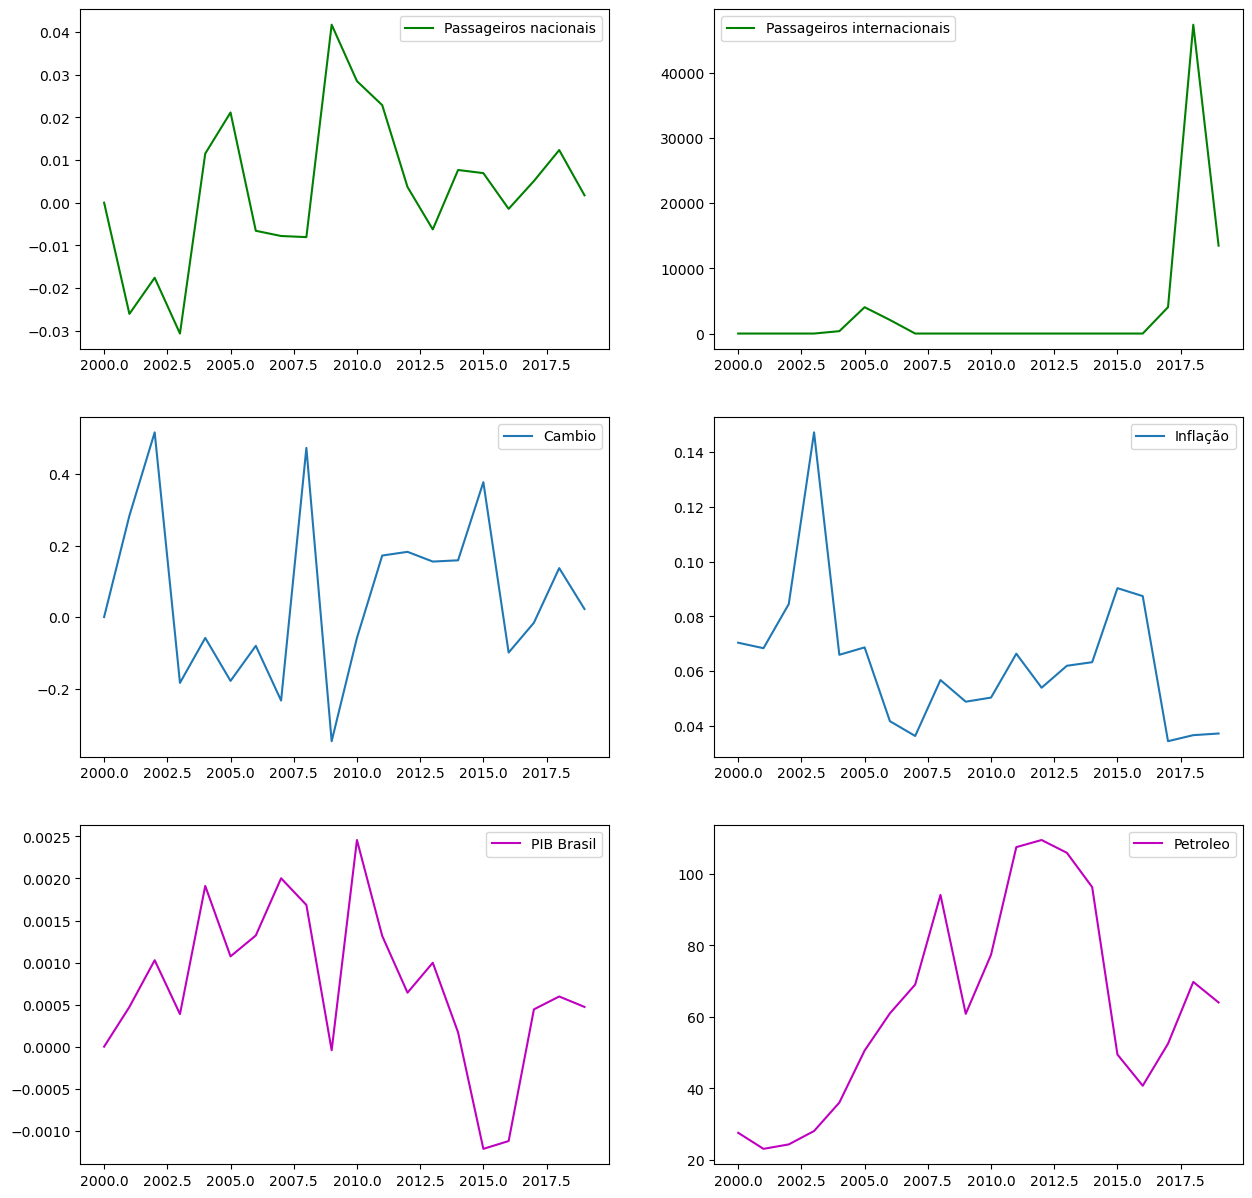

In [41]:
fig, ax = plt.subplots(3,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal_nvt["Ano"], principal_nvt["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal_nvt["Ano"], principal_nvt["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal_nvt["Ano"], principal_nvt["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal_nvt["Ano"], principal_nvt["inflacao"], label='Inflação')
ax[1,1].legend()

#ax[2,0].plot(principal["Ano"], principal["PIB REAL SC"],"c", label = 'PIB SC' )
#ax[2,0].legend()

#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
#ax[2,1].legend()

ax[2,0].plot(principal_nvt["Ano"], principal_nvt["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[2,0].legend()

ax[2,1].plot(principal_nvt["Ano"], principal_nvt["Oil"],"m", label='Petroleo')
ax[2,1].legend()

plt.show()

In [42]:
treino = principal_nvt.loc[principal_nvt["Ano"] < 2017]
teste = principal_nvt.loc[principal_nvt["Ano"] >= 2000]

In [43]:
y_train= treino["Passageiros"].copy()
y_test= teste["Passageiros"].copy()

X_train = treino.drop(["Passageiros", "Passageiros internacionais","Ano","numero_de_passageiros","Oil"],axis=1).copy()
X_test = teste.drop(["Passageiros", "Passageiros internacionais","Ano","numero_de_passageiros","Oil"],axis=1).copy()

In [44]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))


print(f"Coeficiente da regressão linear: {reg.coef_}")
print(reg.intercept_)
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")


Coeficiente da regressão linear: [ 0.3621818  -0.02060894 -0.39732499 -4.8627074 ]
0.033600366493814156
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
O erro do modelo sem ajuste foi: 0.013164326729327382


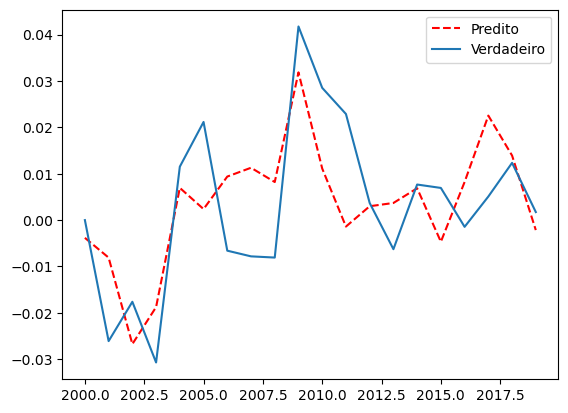

In [45]:
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, principal_nvt["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()


In [46]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

{'poly__degree': 1}


In [47]:
y_pred_pipeline = clf_pipe.predict(X_train)

In [48]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

O erro do modelo com ajuste foi: 0.013599126988257956


In [49]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

RMSE = 0.013164326729327384


In [50]:
import statsmodels.api as sm

#define response variable
y = principal_nvt["Passageiros"].loc[principal_nvt["Ano"]<2020]

#define predictor variables
x = principal_nvt.drop(["Passageiros", "Passageiros internacionais","Ano","numero_de_passageiros","Oil"],axis=1).loc[principal_nvt["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Passageiros   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     2.792
Date:                Fri, 25 Nov 2022   Prob (F-statistic):             0.0647
Time:                        11:11:19   Log-Likelihood:                 58.408
No. Observations:                  20   AIC:                            -106.8
Df Residuals:                      15   BIC:                            -101.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0289      0.011  

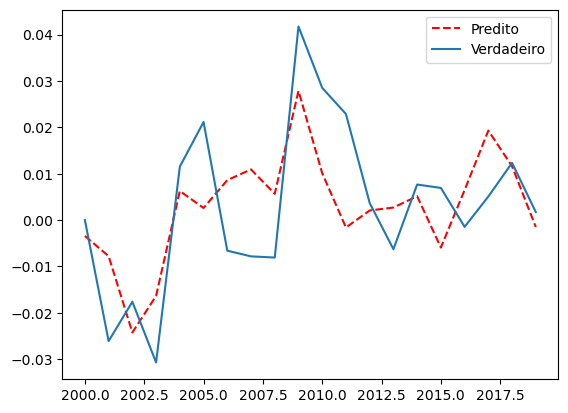

In [51]:
ypred = model.predict(x)
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista,ypred,'--r', label='Predito')
plt.plot(ano_lista, principal_nvt["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()

## Palmas

##### juntando os pontos macros e uma unico DataFrame

In [52]:
principal_pmw =(pmw
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [53]:
principal_pmw.loc[principal_pmw["Ano"] == 2019, "Passageiros_freq"] = 0 
principal_pmw= principal_pmw.loc[principal_pmw["Ano"]<2020]
principal_pmw.corr()

,Ano,Passageiros,Passageiros_freq,numero_de_passageiros,Oil,dolar,inflacao,PIB REAL BRASIL
Ano,1.000000,-0.001023,-0.022306,0.942935,0.498046,0.037939,-0.379601,-0.318404
Passageiros,-0.001023,1.000000,0.049559,0.029421,0.090796,-0.337791,-0.205629,0.279051
Passageiros_freq,-0.022306,0.049559,1.000000,-0.145974,0.006895,-0.418795,0.546400,0.037045
numero_de_passageiros,0.942935,0.029421,-0.145974,1.000000,0.546518,0.135365,-0.344995,-0.404683
Oil,0.498046,0.090796,0.006895,0.546518,1.000000,0.152472,-0.422720,0.287197
dolar,0.037939,-0.337791,-0.418795,0.135365,0.152472,1.000000,0.077090,-0.058331
inflacao,-0.379601,-0.205629,0.546400,-0.344995,-0.422720,0.077090,1.000000,-0.353719
PIB REAL BRASIL,-0.318404,0.279051,0.037045,-0.404683,0.287197,-0.058331,-0.353719,1.000000


##### Análise grafica

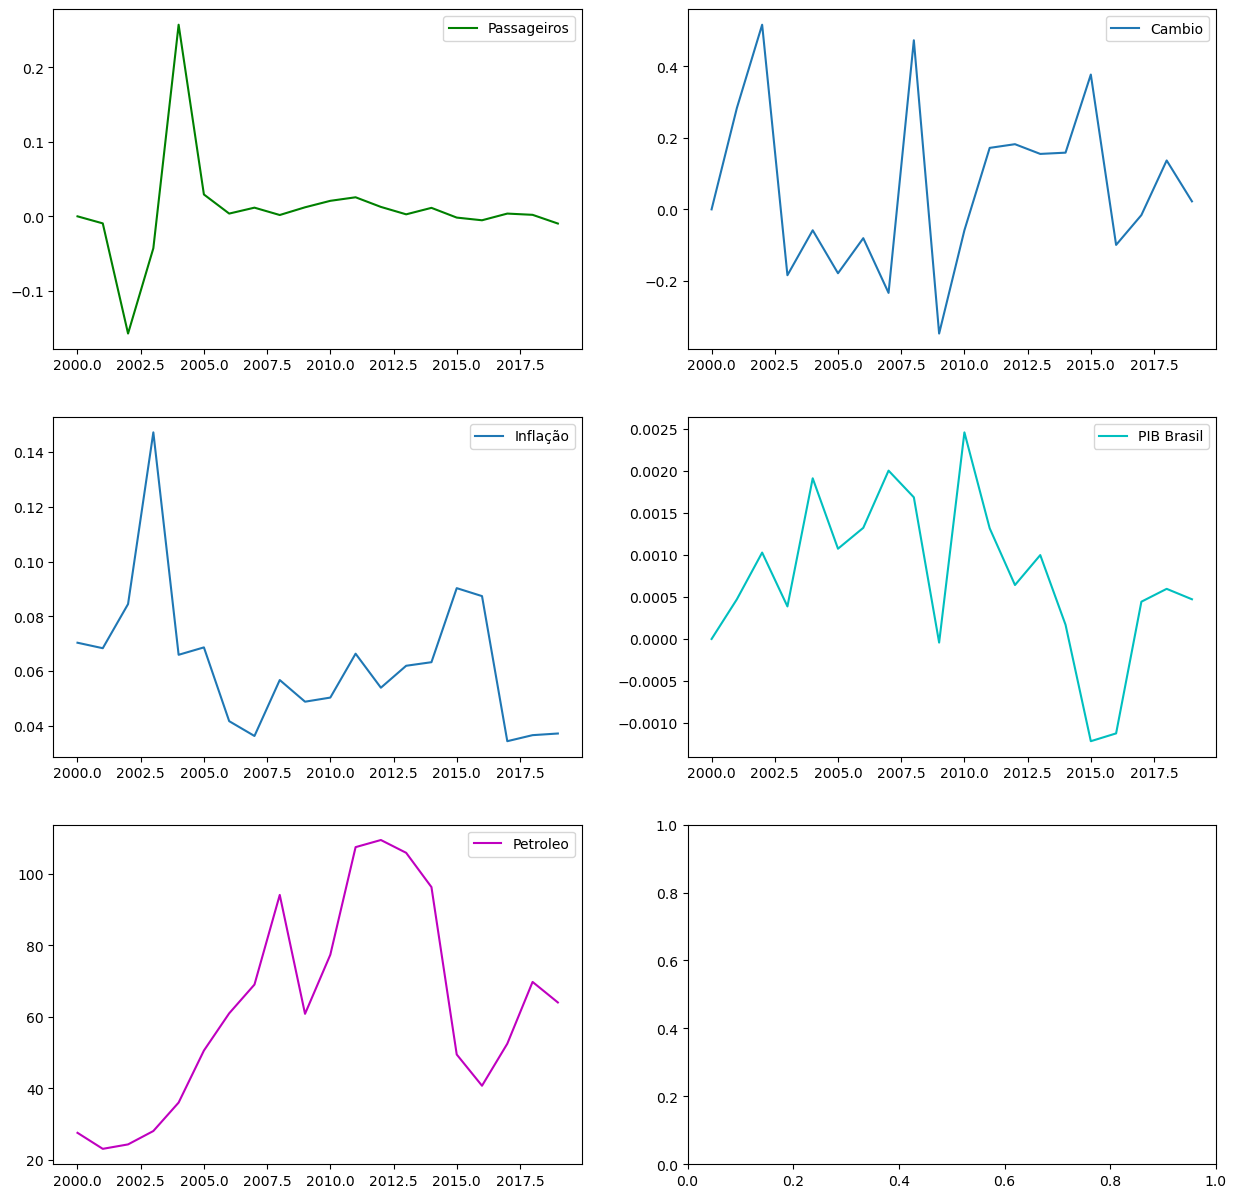

In [54]:
fig, ax = plt.subplots(3,2)

fig.set_size_inches(15,15)


ax[0,0].plot(principal_pmw["Ano"], principal_pmw["Passageiros"],"g", label='Passageiros')
ax[0,0].legend()

#ax[0,1].plot(principal["Ano"], principal["PIB REAL TO"],"g", label='PIB TO')
#ax[0,1].legend()

ax[0,1].plot(principal_pmw["Ano"], principal_pmw["dolar"], label = 'Cambio' )
ax[0,1].legend()

ax[1,0].plot(principal_pmw["Ano"], principal_pmw["inflacao"], label='Inflação')
ax[1,0].legend()

ax[1,1].plot(principal_pmw["Ano"], principal_pmw["PIB REAL BRASIL"],"c", label = 'PIB Brasil' )
ax[1,1].legend()

#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP' )
#ax[2,1].legend()

ax[2,0].plot(principal_nvt["Ano"], principal_nvt["Oil"],"m", label='Petroleo')
ax[2,0].legend()



plt.show()#

In [55]:
treino = principal_pmw.loc[principal_pmw["Ano"] < 2017]
teste = principal_pmw.loc[principal_pmw["Ano"] >= 2000]

In [56]:
y_train= treino["Passageiros"].copy()
y_test= teste["Passageiros"].copy()

X_train = treino.drop(["Passageiros", "Ano","numero_de_passageiros","Oil"],axis=1).copy()
X_test = teste.drop(["Passageiros", "Ano","numero_de_passageiros","Oil"],axis=1).copy()

In [57]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))


print(f"Coeficiente da regressão linear: {reg.coef_}")
print(reg.intercept_)
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")


Coeficiente da regressão linear: [-1.26940543e-02 -9.85472170e-02 -4.40046180e-01  1.41264903e+01]
0.035741224690900096
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
O erro do modelo sem ajuste foi: 0.061955309807587386


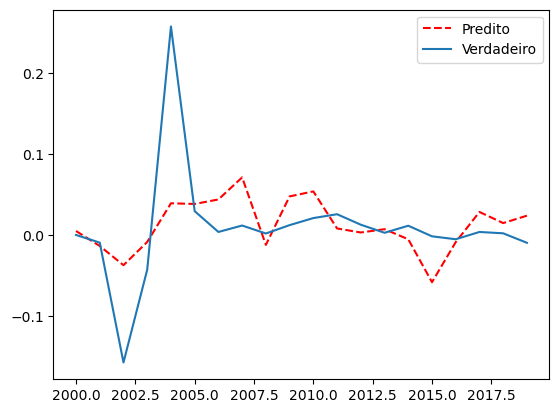

In [58]:
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, principal_pmw["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()


In [59]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

{'poly__degree': 1}


In [60]:
y_pred_pipeline = clf_pipe.predict(X_train)

In [61]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

O erro do modelo com ajuste foi: 0.06636811622229252


In [62]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

RMSE = 0.061955309807587386


In [63]:
import statsmodels.api as sm

#define response variable
y = principal_pmw["Passageiros"].loc[principal_pmw["Ano"]<2020]

#define predictor variables
x = principal_pmw.drop(["Passageiros", "Ano","numero_de_passageiros","Oil"],axis=1).loc[principal_pmw["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Passageiros   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.9002
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.488
Time:                        11:11:23   Log-Likelihood:                 27.361
No. Observations:                  20   AIC:                            -44.72
Df Residuals:                      15   BIC:                            -39.74
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0103      0.065  

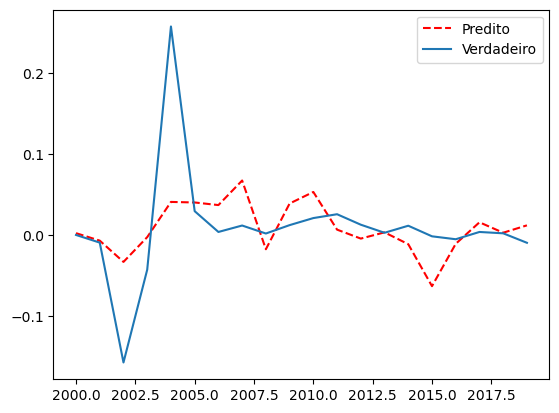

In [64]:
ypred = model.predict(x)
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista,ypred,'--r', label='Predito')
plt.plot(ano_lista, principal_pmw["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()

## São Luiz

##### juntando os pontos macros e uma unico DataFrame

In [65]:
principal_slz =(slz
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [66]:
principal_slz.loc[principal_slz["Ano"] == 2019, "Passageiros_freq"] = 0 
principal_slz= principal_slz.loc[principal_slz["Ano"]<2020]
principal_slz.corr()


,Ano,Passageiros,Passageiros_freq,numero_de_passageiros,Oil,dolar,inflacao,PIB REAL BRASIL
Ano,1.000000,0.020545,-0.074261,0.963178,0.498046,0.037939,-0.379601,-0.318404
Passageiros,0.020545,1.000000,0.250964,0.069284,0.187254,-0.129322,0.008275,0.379534
Passageiros_freq,-0.074261,0.250964,1.000000,-0.232023,-0.062306,-0.358100,0.157277,0.275966
numero_de_passageiros,0.963178,0.069284,-0.232023,1.000000,0.474653,0.131351,-0.325744,-0.373307
Oil,0.498046,0.187254,-0.062306,0.474653,1.000000,0.152472,-0.422720,0.287197
dolar,0.037939,-0.129322,-0.358100,0.131351,0.152472,1.000000,0.077090,-0.058331
inflacao,-0.379601,0.008275,0.157277,-0.325744,-0.422720,0.077090,1.000000,-0.353719
PIB REAL BRASIL,-0.318404,0.379534,0.275966,-0.373307,0.287197,-0.058331,-0.353719,1.000000


##### Análise grafica

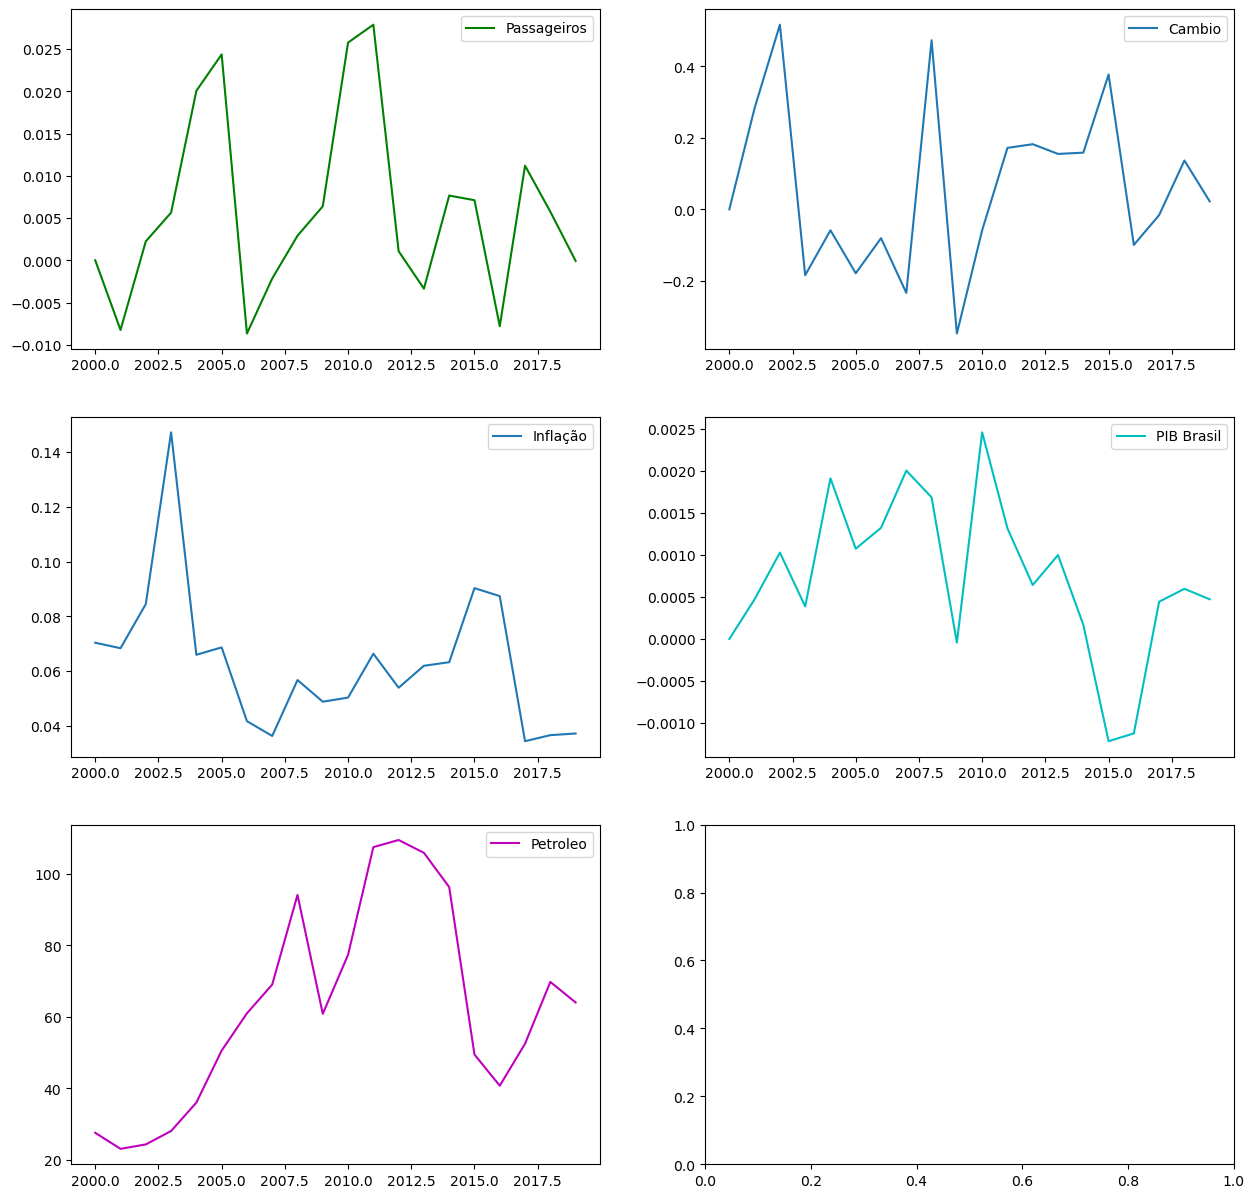

In [67]:
fig, ax = plt.subplots(3,2)

fig.set_size_inches(15,15)


ax[0,0].plot(principal_slz["Ano"], principal_slz["Passageiros"],"g", label='Passageiros')
ax[0,0].legend()

#ax[0,1].plot(principal["Ano"], principal["PIB REAL TO"],"g", label='PIB TO')
#ax[0,1].legend()

ax[0,1].plot(principal_slz["Ano"], principal_slz["dolar"], label = 'Cambio' )
ax[0,1].legend()

ax[1,0].plot(principal_slz["Ano"], principal_slz["inflacao"], label='Inflação')
ax[1,0].legend()

ax[1,1].plot(principal_slz["Ano"], principal_slz["PIB REAL BRASIL"],"c", label = 'PIB Brasil' )
ax[1,1].legend()

#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP' )
#ax[2,1].legend()

ax[2,0].plot(principal_slz["Ano"], principal_slz["Oil"],"m", label='Petroleo')
ax[2,0].legend()



plt.show()#

In [68]:
treino = principal_slz.loc[principal_slz["Ano"] < 2017]
teste = principal_slz.loc[principal_slz["Ano"] >= 2000]

In [69]:
y_train= treino["Passageiros"].copy()
y_test= teste["Passageiros"].copy()

X_train = treino.drop(["Passageiros", "Ano","numero_de_passageiros","Oil"],axis=1).copy()
X_test = teste.drop(["Passageiros", "Ano","numero_de_passageiros","Oil"],axis=1).copy()

In [70]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))


print(f"Coeficiente da regressão linear: {reg.coef_}")
print(reg.intercept_)
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")


Coeficiente da regressão linear: [ 6.49308612e-02 -4.25987912e-03  1.02121591e-01  5.36623636e+00]
-0.0053368076587984046
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
O erro do modelo sem ajuste foi: 0.009789083838715512


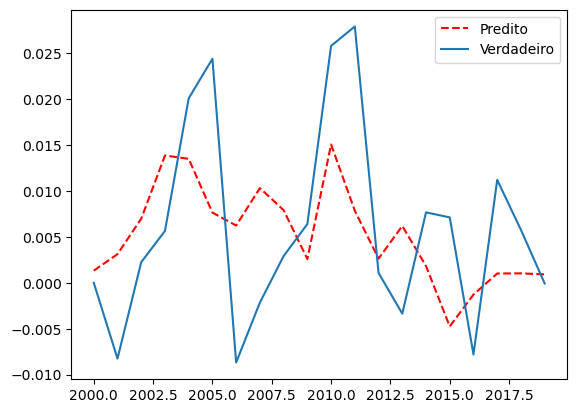

In [71]:
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, principal_slz["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()


In [72]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

{'poly__degree': 1}


In [73]:
y_pred_pipeline = clf_pipe.predict(X_train)

In [74]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

O erro do modelo com ajuste foi: 0.010259169184529404


In [75]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

RMSE = 0.00978908383871551


In [76]:
import statsmodels.api as sm

#define response variable
y = principal_slz["Passageiros"].loc[principal_slz["Ano"]<2020]

#define predictor variables
x = principal_slz.drop(["Passageiros", "Ano","numero_de_passageiros","Oil"],axis=1).loc[principal_slz["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Passageiros   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.8589
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.511
Time:                        11:11:26   Log-Likelihood:                 64.296
No. Observations:                  20   AIC:                            -118.6
Df Residuals:                      15   BIC:                            -113.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0017      0.008  

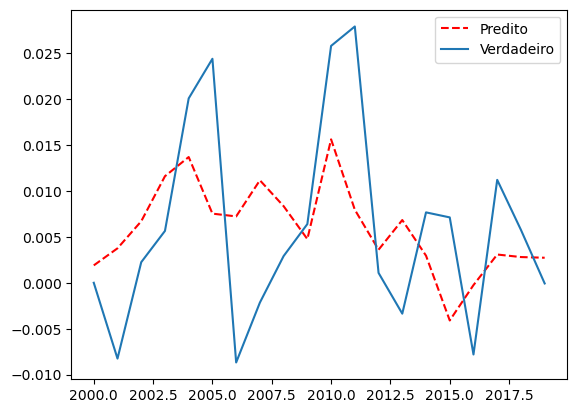

In [77]:
ypred = model.predict(x)
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista,ypred,'--r', label='Predito')
plt.plot(ano_lista, principal_slz["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()